In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("bike_rental.csv")

In [3]:
df.head()

,Date,Rented Bike Count,Temperature(C)
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [4]:
df.columns = ["Date", "Count", "Temp"]

In [5]:
df.head()

,Date,Count,Temp
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [6]:
df.describe()

,Count,Temp
count,8760.000000,8760.000000
mean,704.602055,12.882922
std,644.997468,11.944825
min,0.000000,-17.800000
25%,191.000000,3.500000
50%,504.500000,13.700000
75%,1065.250000,22.500000
max,3556.000000,39.400000


In [7]:
df.isnull().sum()

Date     0
Count    0
Temp     0
dtype: int64

In [8]:
df.drop("Date", axis=1)

,Count,Temp
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0
...,...,...
8755,1003,4.2
8756,764,3.4
8757,694,2.6
8758,712,2.1


In [9]:
x = df["Temp"].to_numpy().reshape(-1, 1)
x

array([[-5.2],
       [-5.5],
       [-6. ],
       ...,
       [ 2.6],
       [ 2.1],
       [ 1.9]])

In [10]:
y = df["Count"].to_numpy().reshape(-1, 1)
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]], dtype=int64)

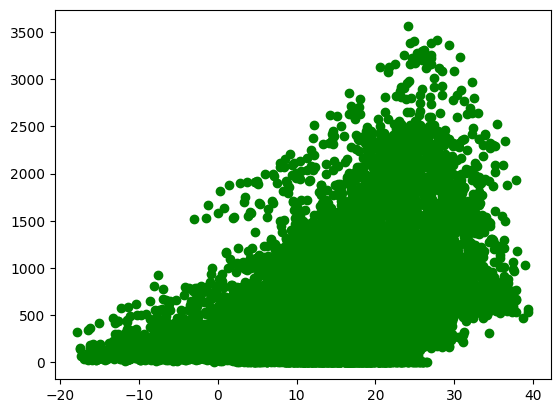

In [11]:
plt.scatter(x, y, c="g")
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([[29.18056467]])

In [15]:
model.intercept_

array([328.28019173])

In [16]:
model.predict(x_test)

array([[ 252.41072359],
       [-118.18244775],
       [ 943.99010632],
       ...,
       [ 623.00389493],
       [ 550.05248325],
       [ 780.57894416]])

In [17]:
model.score(x_test, y_test)

0.2883338297889312

In [25]:
round(model.predict(np.array([-6]).reshape(-1, 1))[0][0])

153

In [27]:
print(f"{round(model.predict(np.array([-6]).reshape(-1, 1))[0][0])} bicycles will be rented if the temperature is -6 degrees Celsius")

153 bicycles will be rented if the temperature is -6 degrees Celsius
